## Broadcasting

#### Overview

**What is broadcasting ?**


Broadcasting is a mechanism of Numpy including implicit behaviors when doing *array* operations, note that the said arrays in these operations can be multi-dimensional. These behaviors are for *reducing the overhead of writing explicit array demension in Numpy*, meaning lower dimension matrix can work higher dimension matrix and a way of *vectorizing* array operations which is prefered over iterations

Let's start by inspect the `for` loop code samples written in Python and C respectively. Note that the variables declarations is leaves out for simplicity

Python version
 
    for i in range(10):
        c.append(a[i]*b[i])

C version

    for ( int i = 0; i<10; i++){
        c[i] = a[i]*b[i];
    }

Efficiency-wise the C version is more computational efficent, much faster, than the Python version because it don't have to deal with Python intetpretation and Python manipulations of objects, while the latter is more naturally resembling what human actually thinks.

The computational difference come from the fact that Python is dynamically typed language, which mean every lines of code produced were interpreted in run-time before feeding into a Virual Machine, part of the Python system, where executions are done. However, there are other languages that use the same approach as Python, Java for instance, are comparable to C, beacause these languages inlclude a JIT complier into their implementation, which translate bytecode into low-level code for computational efficiency. Another thing that effects Python `for` loop is the Python manipulations its objects, the varible `i` is actually iterated on the `range` object by `__next___` rather than simply increasing `i` by 1 in C.

Nevertheless, C code implementations wil increase in complexity when it comes to high-dimensionality data as shown below examples, which still just an element-wise operations
     
    for (int i = 0, i<10, i++){
        for (int j=0, j< 0, j++){
            c[i][j] = a[i]*b[j]
        }
    }

or 
    
    for (int i = 0, i<10, i++){
        for (int j=0, j< 0, j++){
            c[i][j] = a[i][j]*b[i][j]
        }
    }

In mathematical notations, exammples above can be easily easily, and you can do such things by one line of code using Numpy
    
    c = a*b

**Why vectorization is neccessary?**

This is where vectorization comes into the picture, and it important is more emphasized in fields like data science where one have to deal with a lot of mathematical notations. Vectorzation in Numpy means abstracting the *looping, indexing, etc* from user while they actually done automatically by library itself. Vectorization brings he benefits such as:

- Easy to read operations
- Resemble mathematical notations
- Less code, less bugs


**How it work**

Broadcasting is not magic, it works under some constraints, which can be summarized as follow:
- *Broadcasting can only be applied when the demensionality of operands is compatible, either have dimensions with rank of one or same size dimensions*
- For opearands that don't have the same dimension, one that is in lower dimension will be prepended 1 in dimension's list until the dimension lengths of both operand are the same
- The first entry in rank of 1 dimensions will be copied along that dimension when doing matrix operations
- The output matrix will have the dimensionality of the array that in in higher dimension after broadcasting

**Note:** The third statement is from intuition perspective, cause Python is smart enough to not actually copying values but rather re-using them for computing

We will test out these constraints in these exammples below

In [ ]:
import numpy as np
scalar = 3.14
array = np.array([3,17,2021])

scalar*array

array([   9.42,   53.38, 6345.94])

For a visual perspective, we can imagine that `scalar` is stretch along axis `0` and this operation becomes an element-wise multiplication of 2 3-element vectors

[<img src="https://thumbs2.imgbox.com/19/6f/OQtrZlAi_t.jpg">](https://thumbs2.imgbox.com/19/6f/OQtrZlAi_t.jpg)

Other examples with their visual representation

In [ ]:
import numpy as np
array = np.array([3,17,2021])
matrix = np.array([[1,2,3],[4,5,6]])

array+matrix

array([[   4,   19, 2024],
       [   7,   22, 2027]])

![image src="https://thumbs2.imgbox.com/7b/88/feauzVxw_t.jpg"](https://thumbs2.imgbox.com/7b/88/feauzVxw_t.jpg)

In [ ]:
    import numpy as np
arrayA = np.array([3,17,2021])
arrayB = np.array([[1], [2], [3]])
print(arrayA.shape)
print(arrayB.shape)
arrayA*arrayB

(3,)
(3, 1)


array([[   3,   17, 2021],
       [   6,   34, 4042],
       [   9,   51, 6063]])

![image src="https://thumbs2.imgbox.com/37/bc/0KchO5IB_t.jpg"](https://thumbs2.imgbox.com/37/bc/0KchO5IB_t.jpg)

The code sample below will raise `ValueError`

In [ ]:
import numpy as np
array = np.array([3,17,20,21])
matrix = np.array([[1,2,3],[4,5,6]])

array+matrix

ValueError: operands could not be broadcast together with shapes (4,) (2,3) 

#### Application

This broadcasting mechanism of Numpy becomes extremely important in machine learning where observations is represented in vectors and uses some distances metric for dissimilarity measurement such as kNN, kmeans, etc.

## Psuedo Random Generator

#### Overview

In Numpy, random numbers are generated from insances of `Generator` object which use a combination of seeds and `BitGenertor` objects to draw number from specific distributions. The main components of random number genration is seperated into 2 part, a bit generator and a random number generators.

- `BitGenerator` mangage states and has functions that produce doubles or unsigned integer words of 32-bit or 64-bit values
- `Generator` takes this steam provided by the `BitGenrator` and turns them into distributions, normal distribution, for example. A number of bit generator is supported in `Generator` to be provided as initializing parameters, including *PCG4, MT19937, Pholix and SFC64* with the default is PCG64.

Further detail regarding each type of `BitGenerator` can be found in the Numpy documentation.

The code sample below show the `default_rng()`, which is `Generator` with using `PCG64` bit generator, is initialized with a seed and used to generate float in half-open interval of [0, 1]

In [1]:
from numpy.random import default_rng
rg = default_rng(2411)
print(rg)

print(rg.random())

Generator(PCG64)
0.7162573460471173


You can also initiate your own `BitGenerator` and pass it as `Generator`'s parameter

In [2]:
from numpy.random import Generator, PCG64

rg = Generator(PCG64(2411)) # same seed so we expect same value
print(rg)

print(rg.random())

Generator(PCG64)
0.7162573460471173


We will cover the distributions supported by `numpy.random` in next another secition. In this next secition, we will talk little bit about `BitGenerator` and how they are used with `Generator` for sampling random numbers.

#### Bit Generator

In general, `BitGenerator` *does not directly provide random numbers*, which are *not consumable by Python* and only provides functions for *seeding, getting or setting the sate, jumping or advancing the state* and acts as an interface for accessing low-level wrappers.
As shown in example above, for an `BitGenerator` to work, one must *set the inital state via seed*, which can either be single or a list of arbitrary-sized non-negetive integer. The process of turning seeds into the internal states for all `BitGenerator` is handle by `SeedSequence`, using hasing tecchniques
To get a good seed, the recommended practice is to use the OS entropy, which is randomness collected by operating system from hardware, mouse movements, keystrokes, etc. In order to r*eplicate past values, all one needs to do to reuse the same seeds*.

In [ ]:
from numpy.random import PCG64, SeedSequence

seed = SeedSequence().entropy
ss = SeedSequence(seed)
print('seed = {}'.format(ss.entropy))

seed = 73253861914289485580260442329970930941


#### Generating simple data

Return *random integers* from low (inclusive) to high (exclusive) with “discrete uniform” distribution. Created values are put into 1-D array with specified `size`.

In [ ]:
import numpy as np
rng = np.random.default_rng()
print(rng.integers(low=2, size=10))
print(rng.integers(low=1, high=100, size=10))

array([96, 46, 33, 17, 35,  8, 49, 79, 93, 34], dtype=int64)

Return *random floats* in the half-open interval [0.0, 1.0) with “continuous uniform” distribution

In [ ]:
import numpy as np
rng = np.random.default_rng()
print(rng.random())
print(rng.random(size=(5,)))
print(rng.random(size=5)*(5-2) + 2) # random floats from [2,5)

0.3079573605726912
[0.091053   0.95726896 0.73695847 0.86680344 0.71070497]
[4.14590457 3.44218248 2.65352256 2.7551077  4.72186262]


Randomly choose values from a given 1-D array with/without replacement

In [ ]:
import numpy as np
rng = np.random.default_rng()
print(rng.choice(a=5, size=3)) # Generate a uniform random sample from np.arange(5) of size 3
print(rng.choice(a=[14,15,13,11,12], size=3, p=[0.1, 0, 0.3, 0.6, 0])) 
print(rng.choice(a=5, size=3, replace=False)) # Generate a uniform random sample from np.arange(5) of size 3 without replacement
print(rng.choice(a=5, size=3, replace=False, p=[0.1, 0, 0.3, 0.6, 0] )) # Generate a non-uniform random sample from np.arange(5) of size 3 without replacement

fruit = ['banana', 'apple', 'orange', 'cherry']
print(rng.choice(fruit, 5, p=[0.5, 0.1, 0.1, 0.3]))

[4 3 0]
[11 11 11]
[1 0 4]
[3 2 0]
['cherry' 'cherry' 'banana' 'apple' 'banana']


#### Permutations

Methods for randomly permuting a sequence are
- `shuffle`: return in-place ouput and the permutations is done as if the input is 1-D array
- `permutation`: return a copy of input and the permutations is done as if the input is 1-D array
<!-- #- `permute`: return either output type and the permutations is done indepedent of the axis# -->

In [ ]:
import numpy as np
a = np.arange(9).reshape((3, 3))
print(a)
b = rng.shuffle(a)
print('--------')
print(b)
print('--------')
print(a)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
--------
None
--------
[[0 1 2]
 [6 7 8]
 [3 4 5]]


Shuffle can also work on non-numpy sequence

In [ ]:
import numpy as np
rng = np.random.default_rng()
a = ['A', 'B', 'C', 'D', 'E']
rng.shuffle(a, axis=0)
print(a)

['B', 'D', 'E', 'A', 'C']


In [ ]:
import numpy as np
rng = np.random.default_rng()
a = np.arange(9).reshape((3, 3))
print(a)
b = rng.shuffle(a, axis=1)
print('--------')
print(b)
print('--------')
print(a)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
--------
None
--------
[[0 2 1]
 [3 5 4]
 [6 8 7]]


In [ ]:
import numpy as np
rng = np.random.default_rng()
a = np.arange(9).reshape((3, 3))
print(a)
b = rng.permutation(a, axis=0)
print('--------')
print(b)
print('--------')
print(a)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
--------
[[6 7 8]
 [3 4 5]
 [0 1 2]]
--------
[[0 1 2]
 [3 4 5]
 [6 7 8]]
1.19.5


## Numpy supported distributions

We will only go through some noticeable distributions in this section. More details can be found in Numpy official document: https://numpy.org/doc/stable/reference/random/generator.html#distributions

#### Gaussian

Draw samples from a standard Normal distribution (mean=0, stdev=1).

In [ ]:
import numpy as np
rng = np.random.default_rng()
arr = np.zeros((2,2))
print(rng.standard_normal(size=(2,2), out=arr)) # size out arr need to in the same shape

dev = 3
mean = 4
print(rng.standard_normal(size=(2,2), out=arr)*dev + mean) # normal distribution of mean = 4 and standard devitation = 3

[[1.01054461 0.31170979]
 [1.05616597 0.18308725]]
[[ 5.46451238  4.91498558]
 [ 2.17187973 -0.3399272 ]]


Samples mean: 0.0017720135109496218
Samples variances 1.0171953141796264


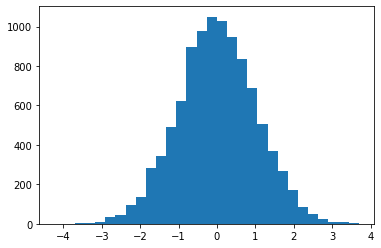

In [23]:
import matplotlib.pyplot as plt
import numpy as np 


rng = np.random.default_rng()
size = 10000
data = rng.standard_normal(size=size)

plt.figure()
plt.hist(data, bins=30)
mean = np.sum(data)/(size+1)
var = np.sqrt(np.sum((data-mean)**2)/(size+1))
print('Samples mean:', mean)
print('Samples variances', var)
plt.show()

Mean and standard deviation can be specified in another function

In [ ]:
import numpy as np
rng = np.random.default_rng()
mean = 4
dev = 3
print(rng.normal(loc = 4, scale = 3, size=(2,2)))


[[8.42602272 1.09244749]
 [3.0411158  5.82291558]]


#### Binominal

Draw samples from a binomial distribution with *n trials and p probability* of success where n an integer >= 0 and p is in the interval [0,1]. Return the number of success over n trials in each test

[2 4 5 7 5 8 7 4 6 8 7 5 2 4 5 4 3 7 6 7 8 7 9 3 4 3 3 7 5 5 2 4 2 5 6 4 5
 3 4 1 3 6 2 4 3 3 5 5 3 4 4 4 6 6 6 6 7 5 4 4 5 4 8 3 3 4 5 6 5 7 3 4 6 4
 4 4 6 8 8 5 3 5 7 6 1 5 4 5 4 4 4 7 9 4 4 4 3 3 6 7]
Success probability:  0.4884511548845116


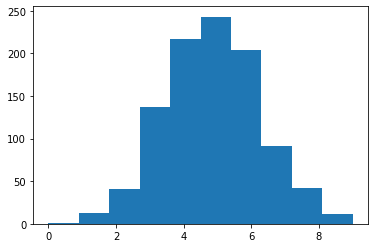

[[3 8 4 4 5 6 4 4 5 6 3 3 3 7 5 3 5 7 6 4 3 6 4 3 2]
 [4 6 3 3 5 8 5 7 8 6 5 4 6 5 3 7 4 4 4 1 6 2 2 4 8]]


In [35]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng()
size = 1000
n, prob = 10, .5  # number of trials, probability of each trial
s = rng.binomial(n=n, p=prob, size = size)  # result of flipping a coin 10 times, tested 100 times. 
print(s[:100])


plt.figure()
print('Success probability: ' ,str(np.sum(s)/(size*n+1)))
plt.hist(s, bins=10)
plt.show()


s = rng.binomial(n=n, p=prob, size=(2,25)) # tested 2*25 = 50 times
print(s)



#### Multinormial

Samples draw from multi nominal distribution

In [36]:
import numpy as np

rng = np.random.default_rng()
n = 10
prob = [0.2, 0.3, 0.4, 0.1] # last element is assumed to account for the rest of the probability when sum(prob[:-1]) < 1
s = rng.multinomial(n=n, pvals=prob, size=25)
print(s)

[[3 1 5 1]
 [1 3 3 3]
 [1 2 6 1]
 [2 3 5 0]
 [1 6 2 1]
 [0 6 2 2]
 [1 3 6 0]
 [2 2 5 1]
 [4 2 3 1]
 [1 1 8 0]
 [4 2 4 0]
 [0 1 6 3]
 [1 3 4 2]
 [2 2 6 0]
 [1 3 5 1]
 [2 5 1 2]
 [1 3 4 2]
 [2 4 4 0]
 [0 4 5 1]
 [2 3 5 0]
 [4 4 1 1]
 [2 2 6 0]
 [2 3 4 1]
 [6 1 2 1]
 [4 1 5 0]]


#### Uniform

Draw samples from a uniform distribution over the half-open interval [low, high)

[-7.05279606e-01 -7.84903522e-01 -7.97303092e-01 -2.52655022e-01
 -5.77068891e-01 -9.83665496e-01 -3.04245763e-01 -6.56383798e-01
 -9.84356529e-01 -7.71416429e-01 -5.53968744e-01 -3.71883821e-01
 -8.50816363e-01 -1.96302940e-01 -4.07659144e-01 -8.21015979e-01
 -2.31217403e-01 -5.02712048e-01 -5.86511382e-01 -2.18409627e-01
 -1.40701817e-01 -6.21200554e-01 -7.58476843e-01 -7.83147375e-01
 -3.57078192e-01 -5.98141903e-01 -5.64574808e-01 -1.55884844e-01
 -6.77584084e-02 -7.70764895e-01 -7.61686194e-01 -6.44516614e-01
 -3.25503823e-01 -6.68238490e-01 -6.25506820e-01 -5.21904400e-01
 -5.25611528e-01 -1.69114429e-01 -3.61171890e-01 -2.74209916e-01
 -2.10239515e-01 -1.63026914e-01 -8.78948271e-01 -2.94023323e-01
 -6.45839457e-01 -4.92168725e-01 -8.38762096e-01 -6.38117187e-01
 -4.10441034e-01 -1.81960875e-01 -2.30681525e-01 -2.00342390e-01
 -1.09401686e-01 -1.64887360e-02 -4.43453133e-01 -1.90565716e-01
 -3.95320989e-01 -6.62584152e-01 -9.34723006e-01 -6.19773683e-01
 -7.21442449e-01 -4.59931

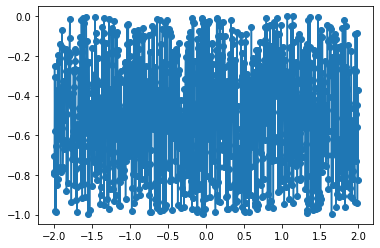

In [40]:
import numpy as np
import matplotlib.pyplot as plt

size=1000
s = np.random.default_rng().uniform(low=-1,high=0,size=size) # for float numbers

plt.figure()
plt.plot(np.linspace(-2,2,1000),s, marker='o')
plt.show

print(s)
s = np.random.default_rng().integers(low=1, high=10,size=(2, 5), endpoint=True) # for intergers, with endpoint for include the high value when sampling
print(s)

#### Poisson

Draw examples from Poission distributions

In [ ]:
import numpy as np
rng = np.random.default_rng()
s = rng.poisson(lam = 3, size=100)
print(s)

[2 0 1 5 0 3 3 6 4 1 6 3 2 3 3 4 6 4 2 5 5 3 2 2 1 1 5 2 3 7 5 2 2 1 3 3 4
 2 2 1 6 1 7 4 2 1 1 2 3 5 3 3 0 2 4 4 1 1 5 4 3 3 2 2 4 4 3 2 1 5 0 3 3 2
 5 2 2 4 1 2 6 4 2 5 2 3 3 3 1 4 1 2 5 1 1 2 5 3 3 3]


## Logic functions

#### Truth value testing

`all` to tell whether all the values along an axis evaluate to True

In [ ]:
temp = np.all([[True,False],[True,True]])
print(temp)
temp = np.all([[True,False],[True,True]], axis=0)
print(temp)
temp = np.all([-1, 4, 5])
print(temp)
temp = np.all([1.0, np.nan])
print(temp)

False
[ True False]
True
True


`any` to tell whether any value along an axis evaluate to True

In [ ]:
temp = np.any([[True,False],[True,True]])
print(temp)
temp = np.any([[True,False],[True,True]], axis=0)
print(temp)
temp = np.any([-1, 4, 5])
print(temp)
temp = np.any([1.0, np.nan])
print(temp)

True
[ True  True]
True
True


#### Array content testing

`isfinite` to test element-wise for finiteness (not infinity or not Not a Number).

`isinf` to test element-wise for positive or negative infinity.

`isnan` to test element-wise for NaN and return result as a boolean array.

`isnat` to test element-wise for NaT (not a time) and return result as a boolean array.

`isneginf` to  element-wise for negative infinity, return result as bool array.

`isposinf` to tetst element-wise for positive infinity, return result as bool array.

In [ ]:
import numpy as np
print(np.isfinite(1))
print(np.isinf(np.inf))
print(np.isnan(np.nan))
print(np.isfinite([23, np.inf]))

True
True
True
[ True False]


#### Array type testing

`iscomplex(x)`: returns a bool array, where True if input element is complex.

`iscomplexobj(x)`: check for a complex type or an array of complex numbers.

`isfortran(a)`: check if the array is Fortran contiguous but not C contiguous.

`isreal(x)`: returns a bool array, where True if input element is real.

`isrealobj(x)`: return True if x is a not complex type or an array of complex numbers.

`isscalar(element)`: returns True if the type of element is a scalar type.


In [ ]:
import numpy as np
print(np.iscomplex([1+1j, 1+0j, 4.5, 3, 2, 2j]))
print(np.iscomplexobj([1+1j, 1+0j, 4.5, 3, 2, 2j]))
print(np.isreal([4.5, 3, 2, 2j]))
print(np.isrealobj([1+0j, 4.5, 3, 2, 2j]))

[ True False False False False  True]
True
[ True  True  True False]
False


#### Logical operations

In [ ]:
`logical_and` or `&`: compute the truth value of x1 AND x2 element-wise.

`logical_or` or `|`: compute the truth value of x1 OR x2 element-wise.

`logical_not`: compute the truth value of NOT x element-wise.

`logical_xor`: compute the truth value of x1 XOR x2, element-wise.

In [ ]:
import numpy as np
print(np.logical_and([True, False], [False, False]))
print(np.array([True, False]) & np.array([True, True]))

[False False]
[ True False]


#### Comparison

Basic comparison operators include: `greater`, `greater_equal`, `less`, `less_equal`, `equal`, `not_equal` which are equivalent to > , >=, <, <= , ==, !=b

`allclose`: returns True if two arrays are element-wise equal within a tolerance.

`array_equiv`: returns True if input arrays are shape consistent and all elements equal.

`isclose` : returns a boolean array where two arrays are element-wise equal within a tolerance. 

`allclose`: returns True if two arrays are element-wise equal within a tolerance.

There is 2 kind of tolerance can be used as parameters for these 2 functions, `atol` and `rtol`. `atol` would work well when the values range is not width while `rtol` can work well when this range is large because it scale depend on different values.

## Linear Algebra

NumPy package contains `numpy.linalg` module that provides all the functionality required for linear algebra

#### Matrix and vector products

`dot` behaviors change base on the shape of operands:
- If both a and b are 1-D arrays, it is inner product of vectors (without complex conjugation).
- If both a and b are 2-D arrays, it is matrix multiplication, just like `matmul` or `@`
- If either a or b is 0-D (scalar), it is equivalent to `a * b` is preferred.
- If a is an N-D array and b is a 1-D array, it is a sum product over the last axis of a and b.
- If a is an N-D array and b is an M-D array (where M>=2), it is a sum product over the last axis of a and the second-to-last axis of b: 
   
`dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])`

In [ ]:
import numpy as np 

a = np.array([[1,2],[3,4]]) 
b = np.array([[11,12],[13,14]]) 
np.dot(a,b)

array([[37, 40],
       [85, 92]])

In [ ]:
import numpy as np 

a = np.arange(3*4*5*6).reshape((3,4,5,6))
b = np.arange(3*4*5*6)[::-1].reshape((5,4,6,3))
print(np.dot(a, b)[2,3,2,1,2,2])

print(sum(a[2,3,2,:] * b[1,2,:,2]))

499128
499128


`vdot` will flatten any multi-dimensionality array and do the inner product

In [ ]:
import numpy as np 
a = np.array([[1,2],[3,4]]) 
b = np.array([[11,12],[13,14]]) 
print(np.vdot(a,b))

130


`inner` : do ordinary inner product of vectors for 1-D arrays, in higher dimensions a sum product over the last axes.

In [ ]:
import numpy as np
a = np.arange(24).reshape((2,3,4))
b = np.arange(4)
np.inner(a, b)

array([[ 14,  38,  62],
       [ 86, 110, 134]])

`outer` : do outer product of 2 vector

In [ ]:
import numpy as np
x = np.array([4,5,6])
np.outer(x, [1, 2, 3])

array([[ 4,  8, 12],
       [ 5, 10, 15],
       [ 6, 12, 18]])

`matmul` has behaviors depends on the arguments in the following way.
- If both arguments are 2-D they are multiplied like conventional matrices.
- If either argument is N-D, N > 2, it is treated as a *stack of matrices residing in the last two indexes and broadcast accordingly.*
- If the first argument is 1-D, it is promoted to a matrix by prepending a 1 to its dimensions. After matrix multiplication the prepended 1 is removed.
- If the second argument is 1-D, it is promoted to a matrix by appending a 1 to its dimensions. After matrix multiplication the appended 1 is removed.

`matmul` differs from `dot` in two important ways:
- Multiplication by scalars is not allowed, use * instead.
- Stacks of matrices are broadcast together as if the matrices were elements, respecting the signature (n,k),(k,m)->(n,m):

In [ ]:
import numpy as np
a = np.arange(2 * 2 * 4).reshape((2, 2, 4))
b = np.arange(2 * 2 * 4).reshape((2, 4, 2))
np.matmul(a,b).shape

(2, 2, 2)

#### Decompositions

`linalg.cholesky`: Cholesky decomposition.

`linalg.qr`: compute the qr factorization of a matrix.

`linalg.svd`: Singular Value Decomposition.

#### Matrix eigenvalues

`linalg.eig`: return the eigenvalues and eigenvectors of a complex Hermitian (conjugate symmetric) or a real symmetric matrix.

`linalg.eigvals`: compute the eigenvalues of a general matrix.

#### Norms and others

`linalg.norm`: matrix or vector norm.

`linalg.det`: compute the determinant of an array.

`trace`: return the sum along diagonals of the array.

#### Solving equations

`linalg.solve`: Solve a linear matrix equation, or system of linear scalar equations.

`linalg.inv`: compute the (multiplicative) inverse of a matrix.


## Statistics in Numpy

Calculations of basicsstatistic measurements are all supported by Numpy: `median`, `mean`, `var`, `std`, `cov`

## Reference
[Numpy Official Website](numpy.org)